In [20]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [38]:
file = open('Datensatz/buergerwolke(3).csv', "r")
data = list(csv.reader(file, delimiter=";"))
file.close()


In [39]:
df = pd.DataFrame(data[1::], columns = data[0])

In [32]:
df.head(10)

,timestamp,name,temperature,pressure,humidity,lux,uv
0,2022-12-22 12:07:18.407000 +00:00,BürgerWOLKE Soest 01,"10,364","994,139","97,040","2766,000","1,260"
1,2022-12-22 12:17:50.221000 +00:00,BürgerWOLKE Soest 01,"10,235","994,188","97,490","4941,000","2,250"
2,2022-12-22 12:28:20.936000 +00:00,BürgerWOLKE Soest 01,"10,323","994,249","96,420","8737,000","4,090"
3,2022-12-22 12:38:52.176000 +00:00,BürgerWOLKE Soest 01,"10,792","994,359","94,340","6801,000","3,390"
4,2022-12-22 12:49:24.356000 +00:00,BürgerWOLKE Soest 01,"10,620","994,420","92,200","7776,000","3,630"
5,2022-12-22 12:59:55.312000 +00:00,BürgerWOLKE Soest 01,"10,561","994,518","91,500","5097,000","2,520"
6,2022-12-22 13:10:26.348000 +00:00,BürgerWOLKE Soest 01,"10,421","994,677","92,400","5389,000","2,690"
7,2022-12-22 13:20:57.978000 +00:00,BürgerWOLKE Soest 01,"10,497","994,750","90,970","4892,000","2,440"
8,2022-12-22 13:31:29.233000 +00:00,BürgerWOLKE Soest 01,"10,221","994,786","91,800","4412,000","2,210"
9,2022-12-22 13:42:00.943000 +00:00,BürgerWOLKE Soest 01,"9,753","994,896","93,120","3701,000","1,880"


In [40]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp')

df['temperature'] = df['temperature'].str.replace(',', '.', regex=True).astype(float)
df['temperature'] = pd.to_numeric(df['temperature'])

df['pressure'] = df['pressure'].str.replace(',', '.', regex=True).astype(float)
df['pressure'] = pd.to_numeric(df['pressure'])

df['humidity'] = df['humidity'].str.replace(',', '.', regex=True).astype(float)
df['humidity'] = pd.to_numeric(df['humidity'])

df['lux'] = df['lux'].str.replace(',', '.', regex=True).astype(float)
df['lux'] = pd.to_numeric(df['lux'])

df['uv'] = df['uv'].str.replace(',', '.', regex=True).astype(float)
df['uv'] = pd.to_numeric(df['uv'])

In [34]:
pd.set_option('display.float_format', '{:.3f}'.format)
df.describe()

,temperature,pressure,humidity,lux,uv
count,41530.000,41530.000,41530.000,41530.000,41530.000
mean,12.531,1001.782,64.610,33838.979,5.642
std,8.862,31.890,31.113,295918.210,10.509
min,-4.821,302.710,0.000,0.000,0.000
25%,5.474,998.266,45.233,0.000,0.000
50%,12.159,1003.881,73.490,1139.500,0.420
75%,18.750,1008.593,90.520,13002.000,5.930
max,41.269,1099.842,99.990,7158277.000,53.720


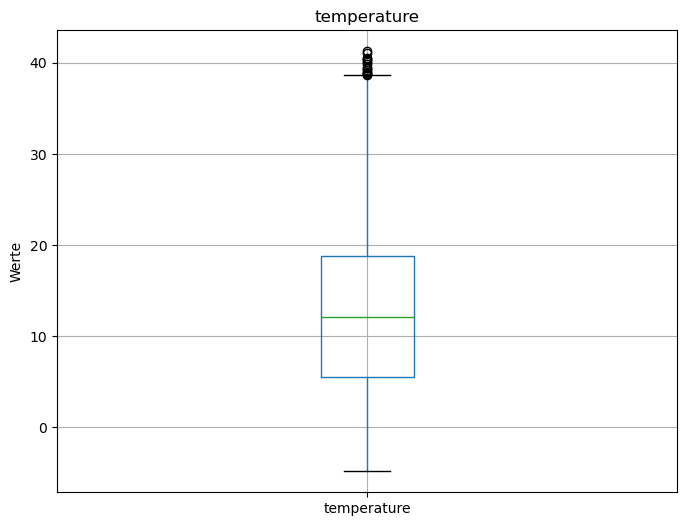

In [23]:
plt.figure(figsize=(8, 6))
df.boxplot(column=['temperature'])

plt.title('temperature')
plt.ylabel('Werte')

plt.show()

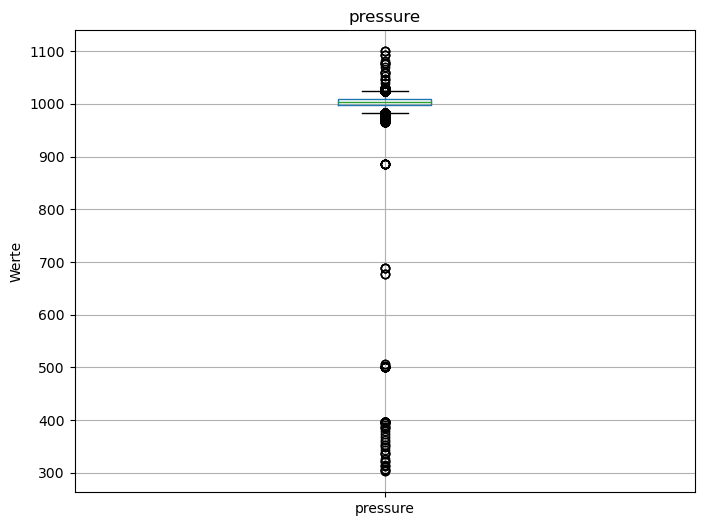

In [25]:
plt.figure(figsize=(8, 6))
df.boxplot(column=['pressure'])

plt.title('pressure')
plt.ylabel('Werte')

plt.show()

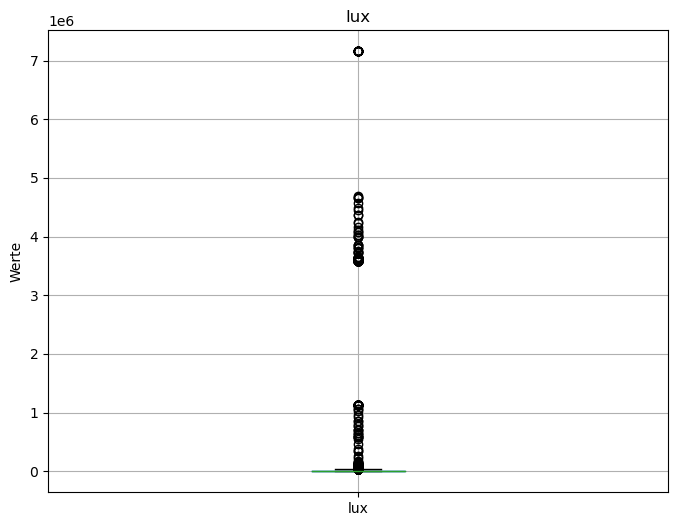

In [26]:
plt.figure(figsize=(8, 6))
df.boxplot(column=['lux'])

plt.title('lux')
plt.ylabel('Werte')

plt.show()

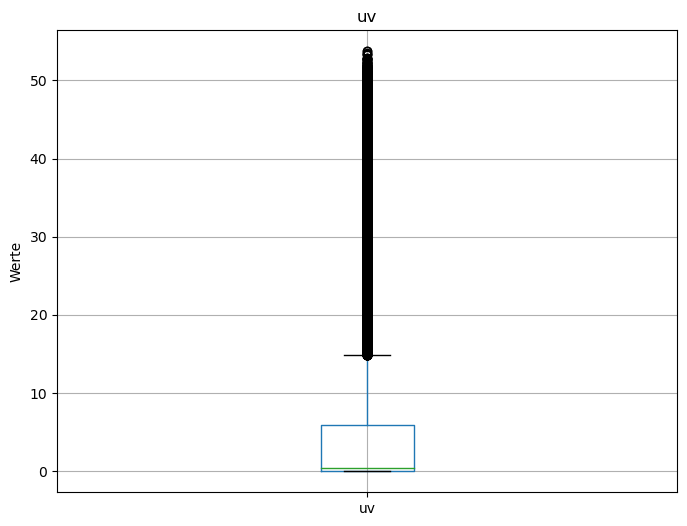

In [27]:
plt.figure(figsize=(8, 6))
df.boxplot(column=['uv'])

plt.title('uv')
plt.ylabel('Werte')

plt.show()

<AxesSubplot:xlabel='timestamp'>

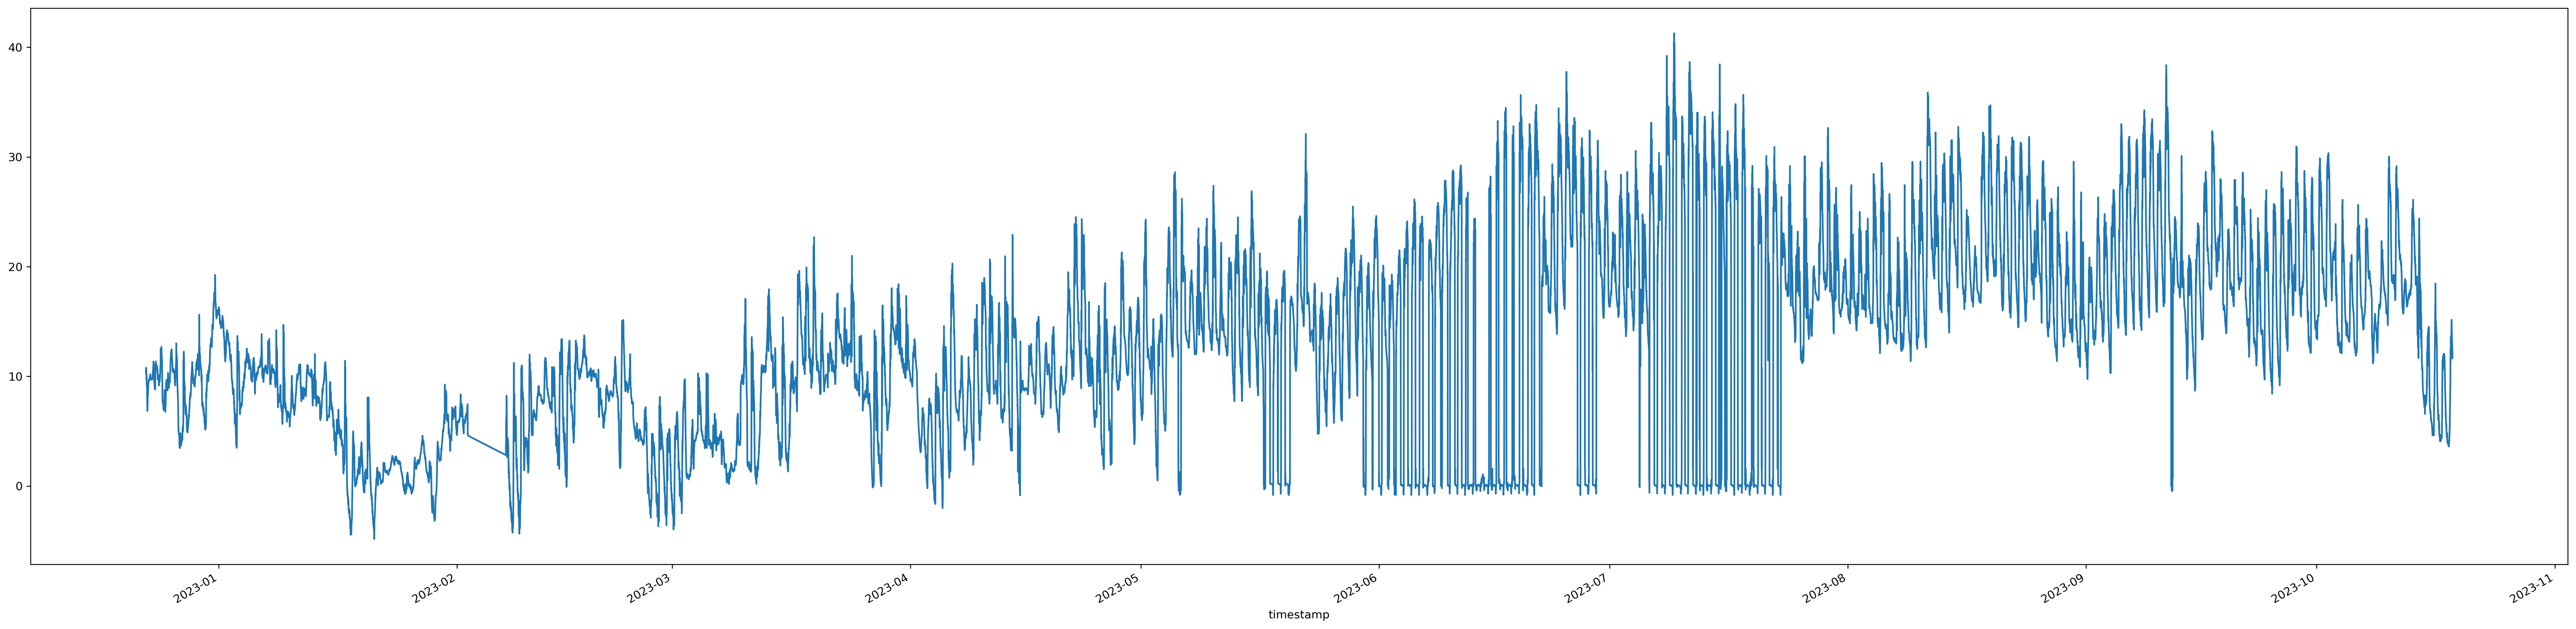

In [45]:
plt.figure(figsize=(40, 10), dpi=300)
df['temperature'].plot()

## Auffällig ist, dass im Sommer 2023 die Temperatur-Werte immer wieder auf 0 Grad fallen